## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN SOLUTION #END CODE HERE` searching for the missing parts (usually denoted with `...`). After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Christina Koutsou"
AEM = "9994(ECE)"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library. From variable *cdata*, you should export the *X* and *y*, from the *data* and *target* variables of the variable *cdata*, respectively, and the feature names and target names from the variables *feature_names* and *target_names*, respectively. Convert the latter two (feature names and target names) into lists. Thus, X and y should be numpy arrays, and feature_names and target_names should be lists. Then split the dataset into train and test set using the appropriate function. Use 33% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [17]:
cdata = load_breast_cancer(as_frame=True)

# BEGIN SOLUTION
X = cdata.data.values
y = cdata.target.values
feature_names = list(cdata.data.columns)
target_names = list(cdata.target_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_VARIABLE)

# END CODE HERE

In [4]:
print("Type of X: {}".format(type(X)))
print("Type of y: {}".format(type(y)))
print("Type of feature_names: {}".format(type(feature_names)))
print("Type of target_names: {}".format(type(target_names)))
print("Size of train set: {}".format(len(y_train)))
print("Size of test set: {}".format(len(y_test)))
print("Unique classes: {}".format(len(set(y_test))))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2


**Expected output**:  

```
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>
Type of feature_names: <class 'list'>
Type of target_names: <class 'list'>
Size of train set: 381
Size of test set: 188
Unique classes: 2
```



**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other, set the *max_depth* to 3, and do not forget to use the *RANDOM_VARIABLE*, as it is crucial for the following part.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Create two DecisionTree classifiers with different impurity measures
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_VARIABLE)

# Train the classifiers on your training data
classifier_gini.fit(X_train, y_train)
classifier_igain.fit(X_train, y_train)

# Perform predictions on your test data
prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

# Evaluate using F1 score
f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)

In [6]:
print("F-Measure Gini: {}".format(f_measure_gini))
print("F-Measure Information Gain: {}".format(f_measure_igain))

F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694


**Expected output**:

```
F-Measure Gini: 0.9663865546218487
F-Measure Information Gain: 0.979591836734694
```

**1.3** In this part, you are going to explore one of the trained decision trees visually. We will use the *classifier_igain* and the function *export_graphviz* to plot the decision tree. You should fill in the missing parts of the functions parameters, which correspond to the decision tree model, the feature names and the target names.


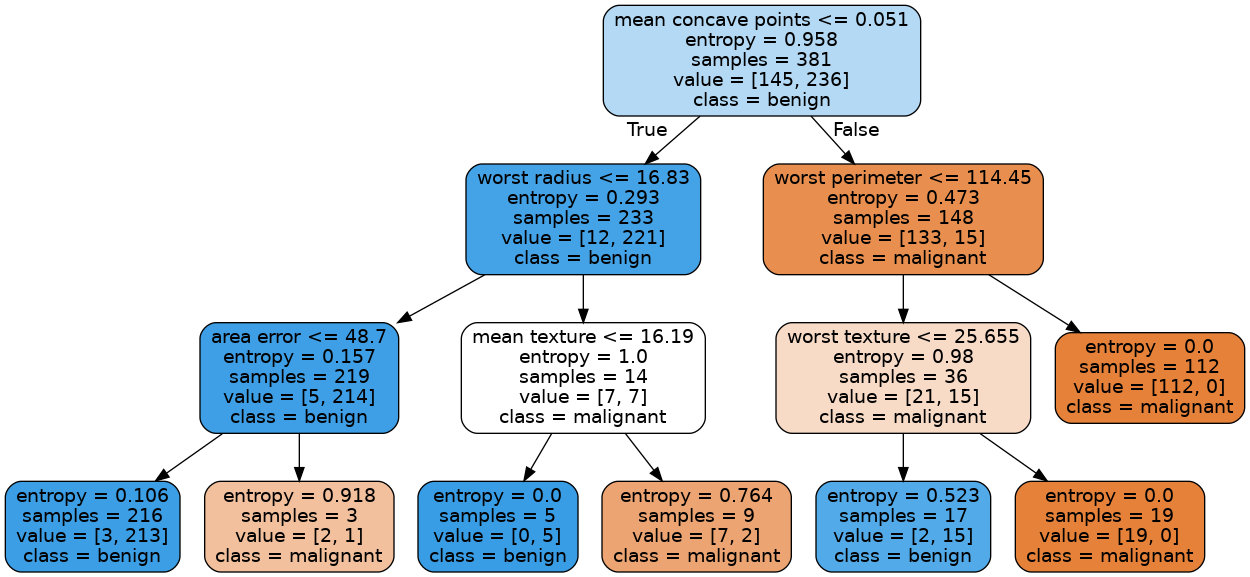

In [7]:
# Let's see how our tree looks
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

# BEGIN SOLUTION
export_graphviz(
        classifier_igain, # decision tree
        feature_names= feature_names,
        class_names = target_names, # need to specify the parameters as they're not in the correct order
        out_file="dtree.dot", 
        rounded=True,
        filled=True
    )
# END CODE HERE

call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=96'])
Image(filename = 'dtree.png')

**1.4** Now, we will examine two random instances (7th and 136th). Thus, we are presenting the decision tree's predictions for these instances, and the ground truth values. Moreover, for each instance, we print the feature values. However, as we can see from the plot above, only 6 features out of the 30 are being used by the tree. Thus, in order to print less information, we will use the *feature_importances_* variable of our tree to check which features has 0 importance to skip them.

In [8]:
instance_a = 7
instance_b = 136
for instance in [instance_a, instance_b]:
  print(str(instance)+ 'th instance a was classified as: ' +target_names[prediction_igain[instance]] +' while the ground truth was: ' + target_names[y_test[instance]])
  # BEGIN SOLUTION
  for idf, feature_name in enumerate(feature_names):
    if classifier_igain.feature_importances_[idf] != 0:
      print('\t'+feature_name+": "+str(X_test[instance][idf]))
  # END CODE HERE
  print('\n')

7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33




**Expected output**:

```
7th instance a was classified as: malignant while the ground truth was: malignant
	mean texture: 15.05
	mean concave points: 0.07953
	area error: 61.1
	worst radius: 20.01
	worst texture: 19.52
	worst perimeter: 134.9


136th instance a was classified as: malignant while the ground truth was: benign
	mean texture: 18.89
	mean concave points: 0.05381
	area error: 19.29
	worst radius: 14.8
	worst texture: 27.2
	worst perimeter: 97.33
```



**1.6** Based on the aforementioned information, and the plotted decision tree, identify one feature value that if changed in each instance, the predicted class will change as well. Specifically, you should find a feature value change that will be small. Answer in the following cell, either with code, or/and writing a small paragraph explaining the feature, the change and why the decision will change.

In [13]:
# BEGIN SOLUTION
iteration = 1
for idf, feature_name in enumerate(feature_names):
    if classifier_igain.feature_importances_[idf] != 0:
        if iteration == 2:     # identify the mean concave points feature id
            break
        else:
            iteration = iteration + 1
for instance in [instance_a, instance_b]:
    X_test[instance][idf] = 0.05   # set the value below 0.051
    prediction = classifier_igain.predict(X_test)
    print("The new predicted class of the " + str(instance) +"th instance is: " + target_names[prediction[instance]])

# END CODE HERE

The new predicted class of the 7th instance is: benign
The new predicted class of the 136th instance is: benign


or/and

We observe the decision tree and the paths that each instance follows. The only feature that is part of the decision path of both instances is the 'mean concave points' feature. Since this feature's value is over 0.051 (the decision threshold) for both instances, we assign a new value to it, below 0.051, for each instance to alter their path. The predicted class has now changed and that can also be confirmed with the use of the plotted decision tree.


**1.7** Train multiple classifiers by modifying the max_depth within the range from 1 to 8 and save the f1 scores to the corresponding list of the *fscores* dictionary (one list for training set and one for test set). Before appending the scores to the corresponding list, multiply them by 100, and round the values to 2 decimals.

In [18]:
# BEGIN SOLUTION
fscores = {'train': [], 'test': []}
for depth in range(1,8):
    classifier = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=RANDOM_VARIABLE)
    classifier.fit(X_train, y_train)
    predict_depth_train = classifier.predict(X_train)
    predict_depth_test = classifier.predict(X_test) # X_test here refers to the original set and not the converted one of cell 1.6
    f_depth_train = f1_score(y_train, predict_depth_train)
    f_depth_test = f1_score(y_test, predict_depth_test)
    fscores['train'].append(round(f_depth_train*100,2))
    fscores['test'].append(round(f_depth_test*100,2))
# END CODE HERE

In [19]:
print("Fscores Train: {}".format(fscores['train']))
print("Fscores Test:  {}".format(fscores['test']))

Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]


**Expected output**:  
```
Fscores Train: [94.24, 95.46, 97.65, 99.15, 99.37, 99.58, 100.0]
Fscores Test:  [91.14, 93.97, 96.64, 94.12, 95.4, 95.04, 93.72]
```

**1.8** Compare the results from the train set with the results from the test set. What do you notice? How are you going to choose the max_depth of your model?

As the max depth of the decision tree increases, the F1 scores on the train set also increase. This behavior is expected as the further splitting of the nodes is enabled and the leaf nodes become more and more pure. In contrast, after a certain value of the max depth (>3), the F1 scores start to decrease slightly. This is probably due to overfitting: as the max depth increases, the leaf nodes become more and more specific (meaning corresponding to fewer samples) and, thus, fail to predict other unseen data accurately. Restricting the size of the max depth allows us to fit the model up to a certain point that offers a perfect balance of specific and generic enough to fit it well (have as pure nodes as possible) and apply it to new data with a high likelihood of successful prediction. In this case, the max depth's value that optimizes our model in the aforementioned way is 3.

## 2.0 Pipelines ##

In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

**2.1** Load the train and test set variables from the files **income.csv** and **income_test.csv**

In [20]:
# BEGIN SOLUTION
train_set = pd.read_csv('income.csv')
y_train = train_set['income']

test_set = pd.read_csv('income_test.csv')
y_test = test_set['income']
# End CODE HERE

**2.2** Check if there are any features with missing values in the data and report them. Check and report the numerical and categorical data, as well.

In [30]:
# BEGIN SOLUTION
missing = train_set.isnull().any() # for any category of data (numerical or categorical), search if there's any column(value) missing
numeric_data = train_set.select_dtypes(include=[np.number])
categorical_data = train_set.select_dtypes(exclude=[np.number]) # non-numeric = categorical, can also be confirmed if we remove the isnull() call and                                                                              print 'categorical_data'
print("All data:")
print(missing)
print("Numerical data:")
print(numeric_data.isnull().any()) # check note below
print("Categorical data:")
print(categorical_data.isnull().any())
# End CODE HERE

All data:
age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
income            False
dtype: bool
Numerical data:
age               False
fnlwgt            False
education_num     False
capital-gain      False
capital-loss      False
hours-per-week    False
dtype: bool
Categorical data:
workclass          True
education         False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
income            False
dtype: bool


Some values are missing from the categories 'workclass' and 'occupation'. To see all the values as missing or not missing (True or False), we can remove the any() call, and to identify the number of missing values we can call sum().

**2.3** Create your pipeline. An acceptable pipeline, should include both numerical and categorical handling.

In [26]:
from sklearn.preprocessing import StandardScaler

# BEGIN SOLUTION

# your pipeline!
numeric_features = ['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")), # we can skip this step as there are no numerical values missing
        ('scaler', StandardScaler()), # ensures that the features have a comparable scale
    ]
)

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'] # without income as it is our target
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("one_hot_cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(criterion='gini', max_leaf_nodes=30, min_samples_split=10, splitter='random'))]
)

# train the pipeline
clf.fit(train_set, y_train)
# print(train_set['occupation']), print a transformed category to confirm that all the transformations happened internally in the pipeline
# End CODE HERE

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('one_hot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_leaf_nodes=30, min_samples_split=10,
                                        splitter='random'))])

**2.4** Evaluate the pipeline's performance, without tuning!

In [24]:
# BEGIN SOLUTION
y_predict = clf.predict(test_set)
# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.841
Model score F1 Weighted: 0.834


**2.5** Perform a gooood grid search to find the best parameters for your pipeline. Both GridSearchCV and RandomizedSearchCV are acceptable

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "classifier__criterion": ["gini","entropy"],
    "classifier__min_samples_leaf": [1, 10, 20, 50],
    "classifier__max_depth": [10, 25, 50, 100],
    "classifier__max_leaf_nodes": [10, 50, 100, 150, 300],
    "classifier__splitter": ["best", "random"]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=4) # run tasks in parallel to speed up the process and not exhaust the CPU
grid_search.fit(train_set, y_train)

print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__criterion': 'gini', 'classifier__max_depth': 25, 'classifier__max_leaf_nodes': 100, 'classifier__min_samples_leaf': 1, 'classifier__splitter': 'best', 'preprocessor__num__imputer__strategy': 'mean'}


**2.6** Evaluate the best model's performance.

In [27]:
# BEGIN SOLUTION
# perform the prediction to the test set
best_estimator = grid_search.best_estimator_

y_predict = best_estimator.predict(test_set)

# End CODE HERE
print("Model score Accuracy: %.3f" % accuracy_score(y_test,y_predict))
print("Model score F1 Weighted: %.3f" % f1_score(y_test,y_predict,average='weighted'))

Model score Accuracy: 0.857
Model score F1 Weighted: 0.853


**2.7** Evaluate your model using at least three different evaluation metrics (note1: except accuracy and weighted f1 score, note2: do not use more than once a variation of f1).

In [28]:
# BEGIN SOLUTION
from sklearn.metrics import average_precision_score, recall_score, roc_auc_score, balanced_accuracy_score

# define the mapping dictionary
label_mapping = {'<=50K': 0, '>50K': 1}

# apply the mapping to convert to numerical values
y_test_num = y_test.map(label_mapping)
mapping_func = np.vectorize(label_mapping.get)
y_predict_num = mapping_func(y_predict)
# print(y_test_num)
# print(y_predict_num)

# metrics for classification
metric1 = recall_score(y_test_num, y_predict_num)
metric2 = roc_auc_score(y_test_num, y_predict_num)
metric3 = average_precision_score(y_test_num, y_predict_num)
metric4 = balanced_accuracy_score(y_test_num, y_predict_num)
#END CODE HERE

In [29]:
print("Model score Recall: %.3f" % metric1)
print("Model score ROC AUC: %.3f" % metric2)
print("Model score Average Precision: %.3f" % metric3)
print("Model score Balanced Accuracy: %.3f" % metric4)

Model score Recall: 0.631
Model score ROC AUC: 0.781
Model score Average Precision: 0.564
Model score Balanced Accuracy: 0.781


**2.8** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

You should achieve at least 85% accuracy score and 84% f1 score.

- As we observed from the output of cell 2.2, there are no numerical data missing. However, in the pipeline an imputer is used in case we hadn't checked that prior to the pipeline's implementation, adding extra unnecessary steps to the pipeline. The strategy that we would otherwise prefer is the 'median' one, as if there's a great deviance in the data/answers on these numerical categories, the median value will be more representative and if not, which is probably our case, the median value will not vary largely from the mean value. On the missing values of the categorical data, they're filled with the most frequent value of the particular category, which would be the safest assumption to make.
- Categorical variables are to be passed through a pipeline which fills the missing positions and converts the data to numeric representations. Since the categories are not in any particular order and are not correlated, we prefer the One-Hot encoding technique to basic integer encoding.
- ColumnTransformer is a part of the overall pipeline and will be responsible for applying the aforementioned pipelines to the equivalent columns of the database, altering their content accordingly before the final step of the pipeline, which would be to create a decision tree classifier. This tree classifier is later used to fit the model with the transformed input data, without actually transforming the initial set (which fit_transform does). So the preprocessor pipeline concludes the handling of the data before the fitting of the model.
- The overall evaluation of the model is based on its accuracy and its F1 score, the latter of which also combines another two evaluation methods, prediction and recall. In order to avoid manual hyperparameter tuning which is timely and not as efficient as an automated procedure, we rely on a grid search to identify the best combination of some pipeline parameters values that produces the greater evaluation scores.
- Evaluation methods and analysis:
    -  Accuracy: The model correctly predicted the class for approximately 85.7% of the samples
    -  F1 Score (weighted): Its value(0.853) indicates good overall performance
    -  Recall: The model correctly identified approximately 63.1% of the positive instances.
    -  ROC AUC: Adequate true positive rate to false positive rate ratio
    -  Balanced Accuracy and Average Precision: Precision-recall balance is relatively low.

  All the metrics except for Accuracy and F1 scores focus on the measurements related to the positive class, so they should constitute the main methods of evaluation in case we're interested in classifying correctly the samples that should be attributed to income > 50K.

**Bonus Question:** Did you like this assignment? Please provide your feedback.

It was really fun and encouraged me to go through the documentation to look for each function's utility and arguments. Also, it didn't diverge greatly from the exercises that were demonstrated in class. I really enjoyed the critical thinking questions as they helped me understand the procedures followed and what the acquired results signified for the model's performance.